<a href="https://colab.research.google.com/github/Shambhavi-Gupta/DS_Data_Visualization_LinePlot-COVID-Data/blob/master/DS_Data_Visualization_Line_Plot_COVID_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])
import seaborn as sns
sns.set(color_codes=True)

In [3]:
import urllib.request

In [5]:
import json

In [9]:
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url ,'data.json')


('data.json', <http.client.HTTPMessage at 0x7f2811e0f240>)

In [33]:
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df= pd.json_normalize(data)   
df['date'] = pd.to_datetime(df['date']) 
df.drop('tt' ,axis =1 ,inplace =True)
df.set_index('date' ,inplace=True)
df = df[df['status'] == 'Confirmed']
df.drop('status' ,axis =1 ,inplace =True)
df = df.apply(pd.to_numeric)
df.reset_index(inplace =True)

In [34]:
df.head()

,date,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
0,2020-03-14,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,0,12,0,0
1,2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0
2,2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
3,2020-03-17,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1
4,2020-03-18,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,0,2,1,0


In [38]:
df.tail()

,date,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
122,2020-07-14,5,1916,75,859,1432,12,114,0,1606,16,170,915,66,699,262,346,2496,608,35,0,6741,2,46,798,5,51,543,333,63,635,45,1524,4526,90,-179,1594,78,1390
123,2020-07-15,5,2432,29,1088,1320,19,177,0,1647,17,198,925,32,678,337,493,3176,623,14,0,7975,19,28,638,0,6,618,288,65,866,11,1597,4496,98,-655,1659,99,1589
124,2020-07-16,4,2593,52,892,1385,16,198,0,1652,18,157,919,36,696,221,490,4169,722,5,0,8641,40,64,735,34,14,494,295,147,737,13,1676,4549,98,-239,2058,197,1690
125,2020-07-17,0,2602,66,1218,1742,25,249,0,1462,32,196,949,40,795,313,601,3693,791,4,0,8308,26,36,704,10,40,718,348,89,615,32,1478,4538,118,-754,1722,120,1894
126,2020-07-18,0,3963,41,1117,1667,31,243,0,1475,45,180,960,40,750,289,441,4537,593,8,0,8348,15,91,681,2,22,591,350,58,711,19,1284,4807,171,-368,1873,174,2198


In [14]:
df_ = pd.melt(df ,id_vars ="date" ,value_vars =list(df.columns).remove("date"),
              var_name ="state" ,value_name = "confirmed")

In [15]:
df_.head()

,date,state,confirmed
0,2020-03-14,an,0
1,2020-03-15,an,0
2,2020-03-16,an,0
3,2020-03-17,an,0
4,2020-03-18,an,0


In [16]:
df_.tail()

,date,state,confirmed
4821,2020-07-14,wb,1390
4822,2020-07-15,wb,1589
4823,2020-07-16,wb,1690
4824,2020-07-17,wb,1894
4825,2020-07-18,wb,2198


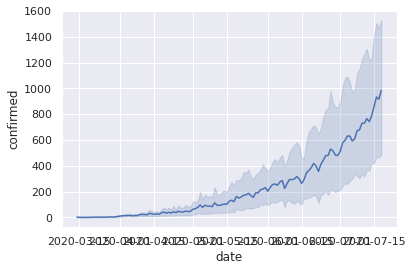

In [17]:
sns.lineplot("date" ,"confirmed" ,data= df_);

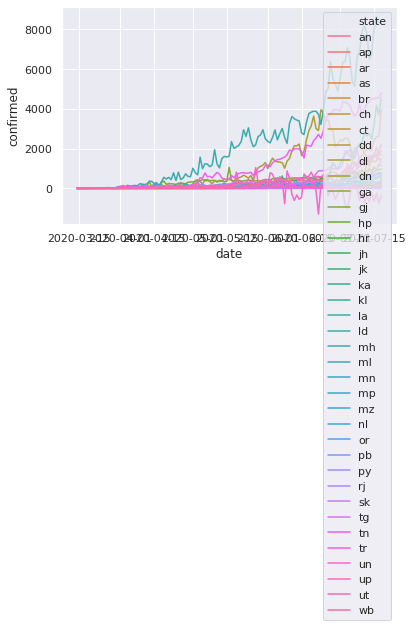

In [18]:
sns.lineplot("date" ,"confirmed" ,hue ="state" ,data= df_);

In [19]:
states = ['mh', 'tn', 'dl', 'wb', 'ka', 'gj']

In [20]:
df_ = df_[df_.state.isin(states)]

In [21]:
df_.head()

,date,state,confirmed
1016,2020-03-14,dl,7
1017,2020-03-15,dl,0
1018,2020-03-16,dl,0
1019,2020-03-17,dl,1
1020,2020-03-18,dl,2


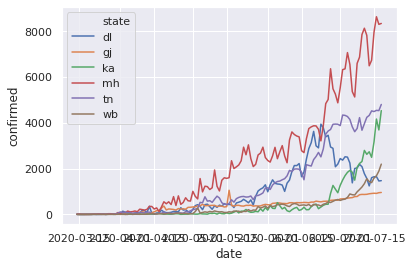

In [22]:
sns.lineplot("date" ,"confirmed" ,hue ="state" ,data= df_);

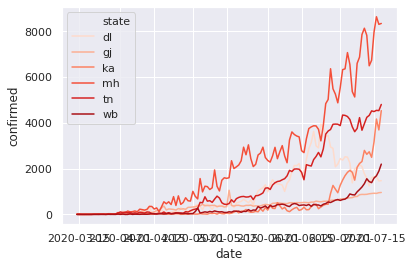

In [25]:
sns.lineplot("date" ,"confirmed" ,hue ="state" ,data= df_, palette ='Reds');

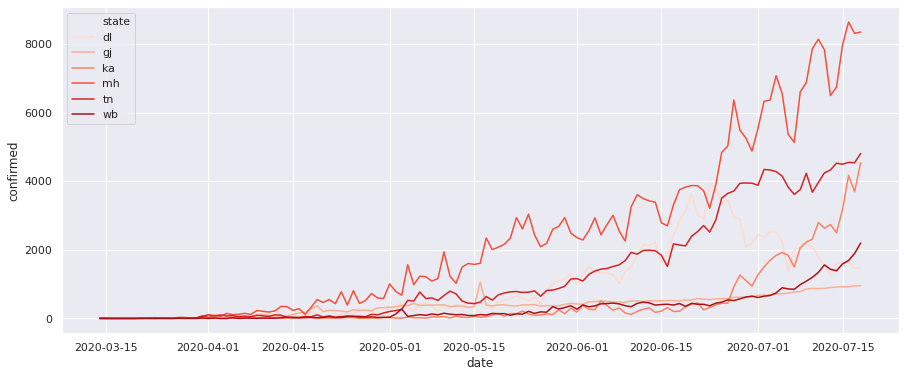

In [26]:
fig = plt.gcf();
fig.set_size_inches(15 ,6)
sns.lineplot("date" ,"confirmed" ,hue ="state" ,data= df_, palette ='Reds');

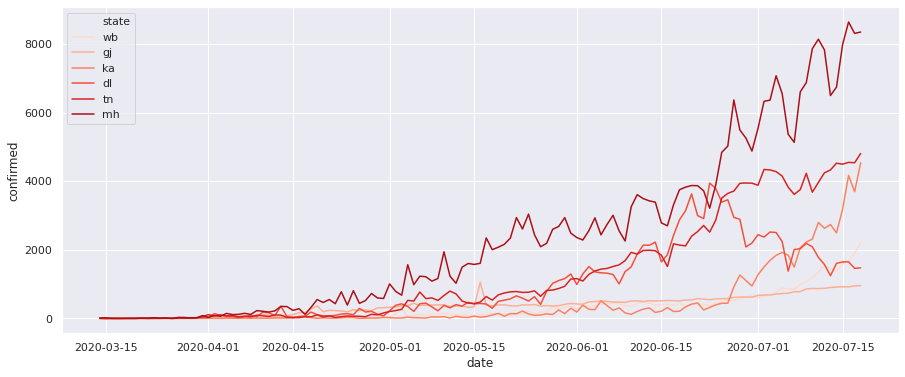

In [28]:
fig = plt.gcf();
fig.set_size_inches(15 ,6)
sns.lineplot("date" ,"confirmed" ,hue ="state" ,data= df_, palette ='Reds',
             hue_order =['wb', 'gj', 'ka', 'dl', 'tn', 'mh']);

In [29]:
with open('data.json') as f:
    data = json.load(f)
data = data['states_daily']
df= pd.json_normalize(data)   
df['date'] = pd.to_datetime(df['date']) 
df.drop('tt' ,axis =1 ,inplace =True)
df.set_index('date' ,inplace=True)
df = df[df['status'] == 'Confirmed']
df.drop('status' ,axis =1 ,inplace =True)
df = df.apply(pd.to_numeric)
df = df.rolling(7).mean()
df.reset_index(inplace =True)

In [30]:
df_ = pd.melt(df ,id_vars ="date" ,value_vars =list(df.columns).remove("date"),
              var_name ="state" ,value_name = "confirmed")

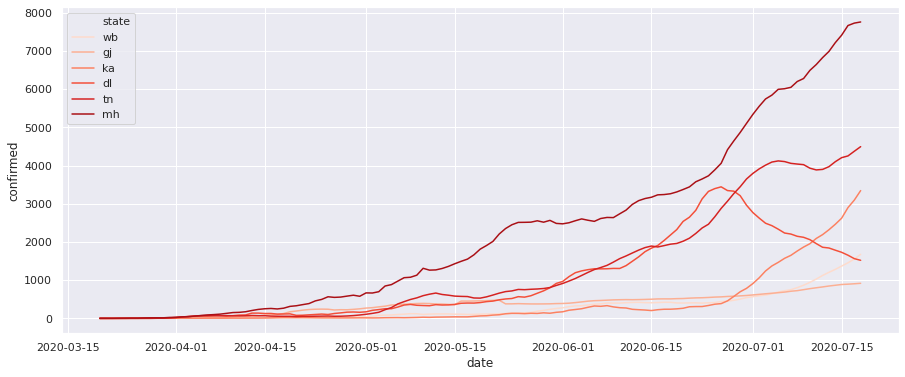

In [31]:
fig = plt.gcf();
fig.set_size_inches(15 ,6)
sns.lineplot("date" ,"confirmed" ,hue ="state" ,data= df_, palette ='Reds',
             hue_order =['wb', 'gj', 'ka', 'dl', 'tn', 'mh']);